In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def float_to_int(x): # function to convert float to integer (i.e.: 2014.0 to 2014)
    split_string = x.split(".") # splits input argument at decimal point, returns an array (i.e.: 2014.0 to [2014, 0])
    substring = split_string[0] # takes the value at the index 0 of new array (i.e.: 2014 of [2014, 0])
    if len(substring) > 0: # if the length of the substring is greater then 0 (which means, in the case that there is data in that cell) 
        return int(substring) # convert the substring to an integer, and return that integer
    else: # otherwise (in the case that there is no data in that cell)
        return '' # return an empty string

df = pd.read_csv('cleaned.csv', converters={'calendar_year': float_to_int}) # read csv and call the float_to_int function on the column calendar_year
df

,calendar_year,city,state,closed_date,amount_awarded
0,2019,Chicago,IL,2019-01-29,160000.0
1,2018,Chicago,IL,2018-10-02,100000.0
2,2019,Chicago,IL,2019-05-30,70000.0
3,2010,Chicago,IL,2010-09-24,60000.0
4,2010,Chicago,IL,2010-03-18,99000.0
...,...,...,...,...,...
39011,2019,North Charleston,SC,2019-12-15,40000.0
39012,2019,North Charleston,SC,2019-11-05,70000.0
39013,2019,North Charleston,SC,2019-11-05,70000.0
39014,2019,North Charleston,SC,2019-11-05,110000.0


In [2]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
amount_awarded = df.groupby(['city'], as_index=False)['amount_awarded'].sum().round()

In [3]:
pop = pd.read_csv('population_data.csv')

In [4]:
pop

,id,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,city_name
0,1,8175133,8175031,8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817,"New York City, New York"
1,2,3792621,3793139,3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576,"Los Angeles, California"
2,3,2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,"Chicago, Illinois"
3,6,1526006,1526012,1528283,1540466,1551824,1558313,1565460,1571065,1576051,1580601,1583592,1584064,"Philadelphia, Pennsylvania"
4,16,805235,805184,805505,815650,828876,839572,850750,863010,871512,878040,880696,881549,"San Francisco, California"
5,17,820445,820457,821579,827664,835499,844696,850164,853714,859049,863478,870960,876384,"Indianapolis (balance), Indiana"
6,20,601723,601767,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749,"Washington, District of Columbia"
7,21,617594,617792,621048,630505,642955,653002,662855,670491,679848,687788,691147,692600,"Boston, Massachusetts"
8,24,713777,713898,711131,705118,700183,691868,682609,679410,677143,674631,672977,670031,"Detroit, Michigan"
9,28,646889,651873,652326,655341,658786,657146,654990,654106,652548,650878,651104,651073,"Memphis, Tennessee"


In [5]:
pop2 = pop.groupby(['city_name'], as_index=False)[['Estimates Base']].sum()

In [6]:
def cityState_to_city(x): # function to convert float to integer (i.e.: 2014.0 to 2014)
    split_string = x.split(",") # splits input argument at decimal point, returns an array (i.e.: 2014.0 to [2014, 0])
    substring = split_string[0] # takes the value at the index 0 of new array (i.e.: 2014 of [2014, 0])
    if len(substring) > 0: # if the length of the substring is greater then 0 (which means, in the case that there is data in that cell) 
        return substring # convert the substring to an integer, and return that integer
    else: # otherwise (in the case that there is no data in that cell)
        return ''
pop3 = pd.read_csv('population_data.csv', converters={'city_name': cityState_to_city})

In [7]:
pop4 = pop3.groupby(['city_name'], as_index=False)[['Estimates Base']].sum()

In [8]:
pop3

,id,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,city_name
0,1,8175133,8175031,8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817,New York City
1,2,3792621,3793139,3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576,Los Angeles
2,3,2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,Chicago
3,6,1526006,1526012,1528283,1540466,1551824,1558313,1565460,1571065,1576051,1580601,1583592,1584064,Philadelphia
4,16,805235,805184,805505,815650,828876,839572,850750,863010,871512,878040,880696,881549,San Francisco
5,17,820445,820457,821579,827664,835499,844696,850164,853714,859049,863478,870960,876384,Indianapolis (balance)
6,20,601723,601767,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749,Washington
7,21,617594,617792,621048,630505,642955,653002,662855,670491,679848,687788,691147,692600,Boston
8,24,713777,713898,711131,705118,700183,691868,682609,679410,677143,674631,672977,670031,Detroit
9,28,646889,651873,652326,655341,658786,657146,654990,654106,652548,650878,651104,651073,Memphis


In [9]:
frames = [pop4, amount_awarded]
result2 = pd.concat(frames)
result = pd.concat(frames, axis=1)

In [10]:
df3 = amount_awarded.sort_values(['city'], ascending=True)

In [11]:
df3.drop([23, 25], inplace=True) 

In [12]:
df3.reset_index(drop=True, inplace=True)

In [13]:
frames = [pop4, df3]
result2 = pd.concat(frames)
result = pd.concat(frames, axis=1)

In [14]:
result.drop(columns=['city_name'], inplace=True)

In [15]:
first_column = result.pop('city')
result.insert(0, 'city', first_column)

In [16]:
middle_column = result.pop('amount_awarded')
result.insert(1, 'amount_awarded', middle_column)

In [17]:
result['per_capita'] = result['amount_awarded']/result['Estimates Base']

In [18]:
result

,city,amount_awarded,Estimates Base,per_capita
0,Atlanta,4761182,427059,11
1,Baltimore,18432748,229423,80
2,Baton Rouge,2879795,617792,5
3,Boston,11905482,105148,113
4,Charleston,1520250,120364,13
5,Chicago,467586464,2695652,173
6,Cincinnati,2472787,297025,8
7,Cleveland,28573475,396665,72
8,Columbia,1030935,130421,8
9,Detroit,57702989,713898,81


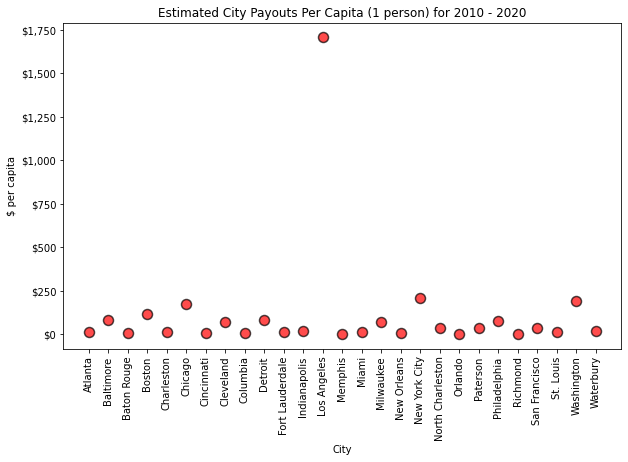

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = result['city'], y = result['per_capita'], s= 100, color = "red", edgecolors = "black", linewidths = 1.5, alpha = 0.7)
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("$ per capita")
ax.yaxis.set_major_formatter('${x:,.0f}') 
plt.title('Estimated City Payouts Per Capita (1 person) for 2010 - 2020')



plt.show()